## **Perrin Freres Monthly Champagne Sales Forecasting**

###### Dataset copyright :- https://www.kaggle.com/anupamshah/perrin-freres-monthly-champagne-sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from pylab import rcParams
rcParams['figure.figsize']=[14,8]
sns.set_style('dark')

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/master/perrin-freres-monthly-champagne-.csv')

In [3]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [4]:
#edit columns names 
df = df.rename(columns = {df.columns[0]:'Date',
                     df.columns[1]:'Sales'})

In [5]:
#drop useless rows
df.drop(106,inplace=True)
df.drop(105,inplace=True)

In [6]:
df

,Date,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [7]:
# set the data index and it's freq
df.Date=pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)
df.index.freq = 'MS'

In [8]:
# Visualize the data 

<AxesSubplot:xlabel='Date'>

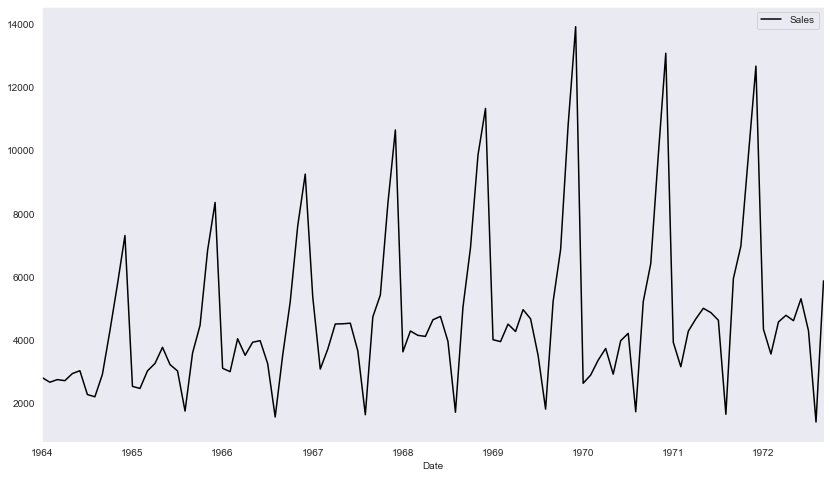

In [9]:
df.plot(c='k')

In [10]:
#check data stationarity using Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller

In [11]:
adfuller(df)[1]

0.3639157716602477

In [12]:
# p-value > 0.05 so we can't reject the null hyp.  ,, so data is not stationary

In [13]:
# trying the first diff
adfuller(df.diff().dropna())

(-7.1898964480509955,
 2.5196204473871266e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1466.826726291589)

<AxesSubplot:xlabel='Date'>

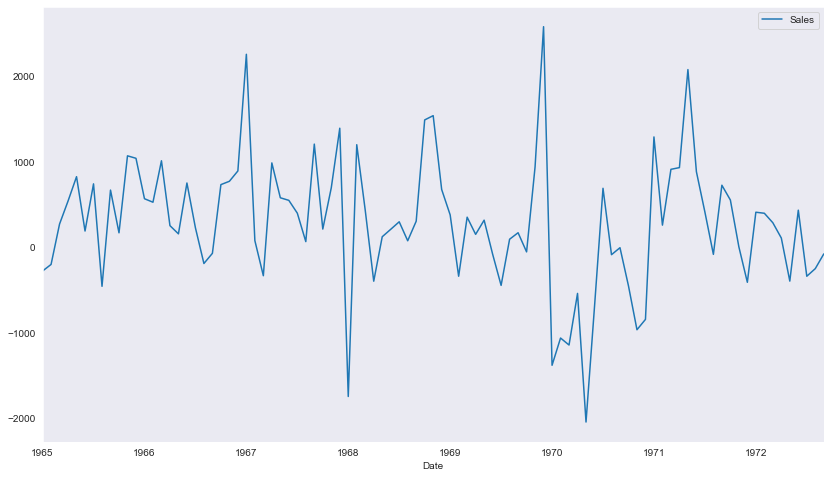

In [14]:
# Seasonal Diffrancing 
df.diff(12).dropna().plot()

In [15]:
# for both (1st diff and seasonal 1st diff ) p-values < 0.05
# so we can reject the null hyp. ,, data is stationary 

In [16]:
Seasonal_1st_diff = df.diff(12).dropna()

<AxesSubplot:xlabel='Date'>

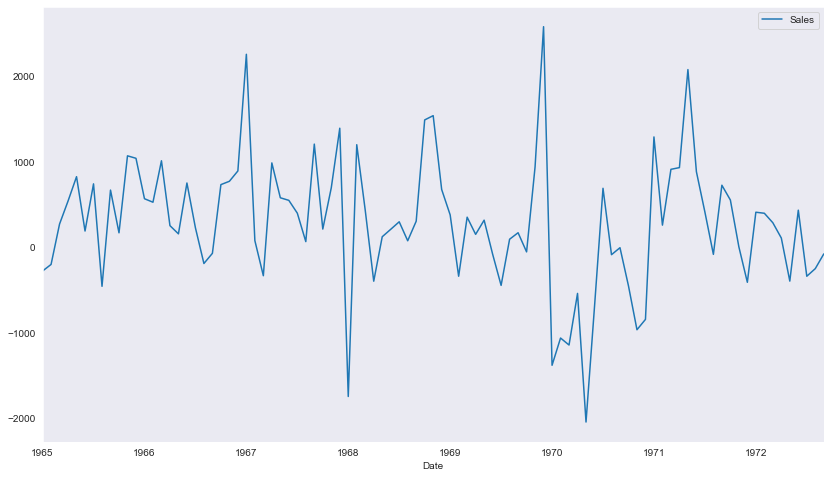

In [17]:
Seasonal_1st_diff.plot()

In [18]:
adfuller(Seasonal_1st_diff)

(-7.626619157213164,
 2.060579696813685e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1294.7753384560438)

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf

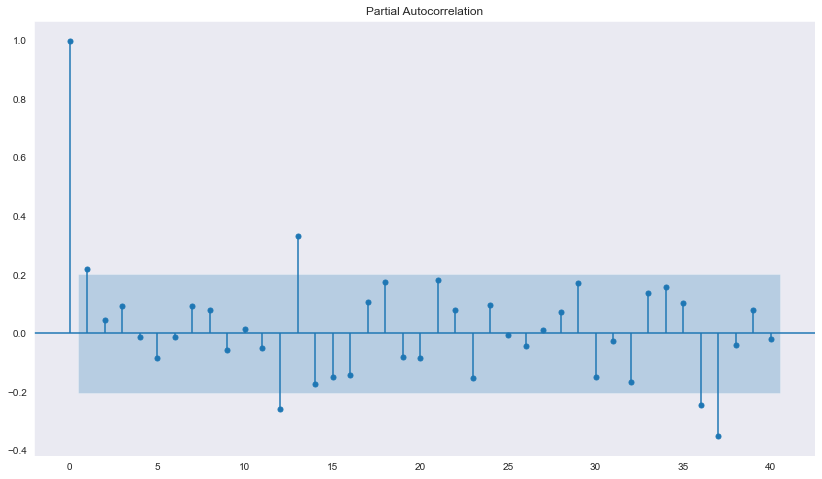

In [20]:
plot_pacf(Seasonal_1st_diff,lags=40);

In [21]:
# Check the better (p,d,q) for our model using auto_arima

In [22]:
from pmdarima import auto_arima

In [23]:
auto_arima(df,seasonal=True,m=12,trace = True,)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1505.396, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1500.884, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1498.757, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1498.942, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1511.271, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1499.959, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1499.625, Time=0.12 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1500.741, Time=0.12 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1499.028, Time=0.05 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1501.490, Time=0.21 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1500.866, Time=0.10 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1500.295, Time=0.20 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1500.747, Time=0.08 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1498.167, Time=0.23 sec
 ARIMA(0,0,1)(0,1,0

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [24]:
# Applying Seasonal-ARIMA (SARIMA)

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
train=df.iloc[:85]
test=df.iloc[85:]

In [27]:
# tray SARIMAX with oreders ---> order=(0, 0, 1), seasonal_order=(1, 1, 0, 12)
model1 = SARIMAX(train,order=(0, 0, 1), seasonal_order=(1, 1, 0, 12)).fit()

In [28]:
pred = model1.predict(start = len(train),end = len(df)-1)

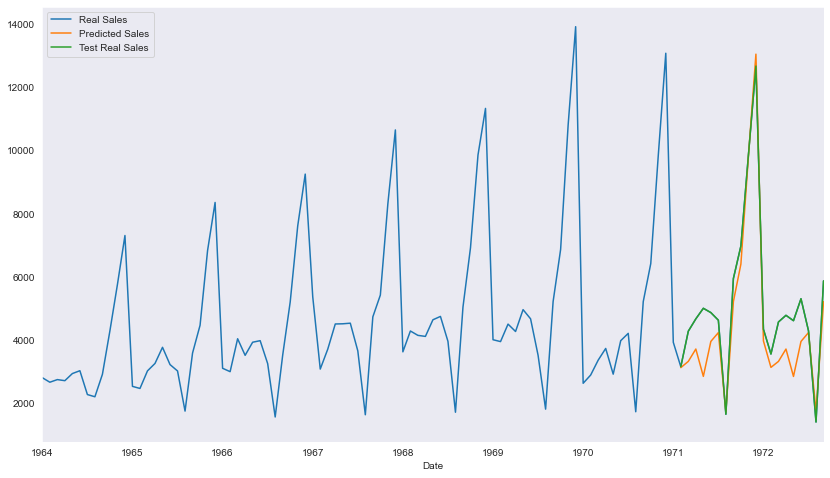

In [29]:
#Evaluate model1 visiualy
df.Sales.plot(label = 'Real Sales')
pred.plot(label = 'Predicted Sales')
test.Sales.plot(label = 'Test Real Sales')
plt.legend()

In [30]:
# Evaluate model1 statisticly
from statsmodels.tools.eval_measures import rmse
rmse(test.Sales,pred)

920.1611042179916

In [31]:
# tray SARIMAX with oreders ---> order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)
model2 = SARIMAX(train,order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)).fit()
pred2 = model2.predict(start = len(train),end = len(df)-1)

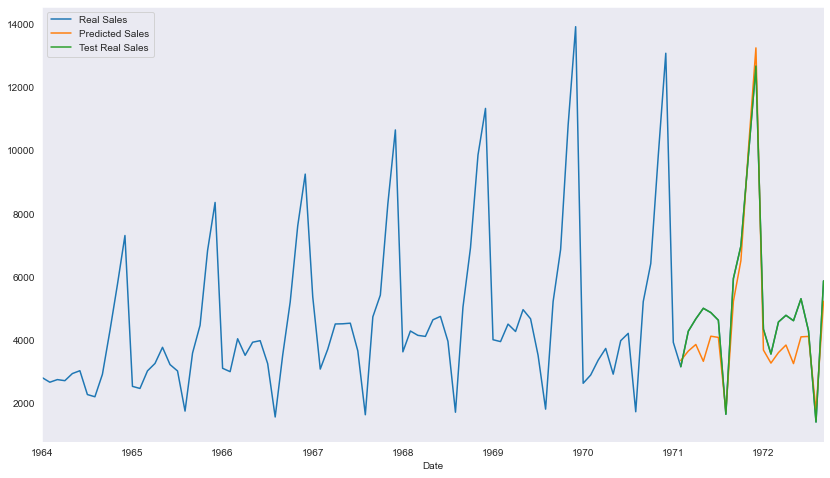

In [32]:
df.Sales.plot(label = 'Real Sales')
pred2.plot(label = 'Predicted Sales')
test.Sales.plot(label = 'Test Real Sales')
plt.legend()

In [33]:
# Evaluate model2 statisticly
from statsmodels.tools.eval_measures import rmse
rmse(test.Sales,pred2)

776.776488982952

In [34]:
# model2 perform better than model1 

In [35]:
# Set the Final Model 
Final_Model = model1 = SARIMAX(df.Sales,order=( 1, 1, 1), seasonal_order=(1, 1, 0, 12)).fit()

In [36]:
Next_Year_Pred = Final_Model.predict(start = len(df)-1,end=len(df)+12)

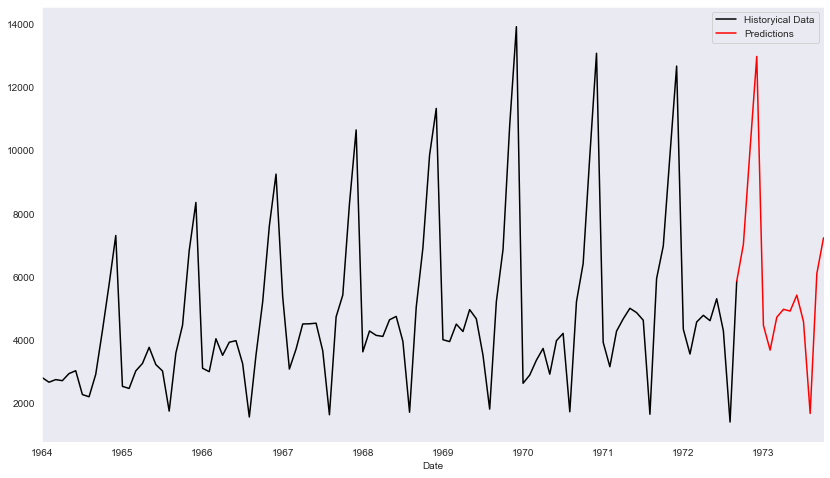

In [37]:
df.Sales.plot(c='k',label='Historyical Data')
Next_Year_Pred.plot(c='r',label = 'Predictions')
plt.legend()

In [38]:
# Thank you .. 